# Color Detection and Differentiation

### Importing Libraries

In [34]:
from collections import Counter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib import colors
import cv2

### Converting RGB to HEX 

In [22]:
def rgb_to_hex(color):
    hex_color = "#"
    for i in color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [23]:
rgb_to_hex([255, 0, 0])

'#ff0000'

### Reading and reshaping images

In [37]:
img_1 = "img/bore.jpeg"
img_2 = "img/aesthetic.png"
raw_img = cv2.imread(img_1)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

In [38]:
img = cv2.resize(raw_img, (900, 600), interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

In [39]:
img = img.reshape(img.shape[0] * img.shape[1], 3)
img.shape

(540000, 3)

In [40]:
img

array([[111, 113, 112],
       [110, 112, 111],
       [112, 114, 113],
       ...,
       [126,  99,  82],
       [125,  98,  81],
       [125,  98,  81]], dtype=uint8)

### Kmeans Algorithm from Scratch

In [ ]:
class Kmeans_from_scratch:
    def __init__(self, k, max_iter = 300, n_init = 10, random_state=0):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        self.centroids = self.init_centroids(X)
        self.labels = np.zeros(X.shape[0])
        for i in range(self.n_init):
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)

        num = 1
        while num < self.max_iter:
            centroids_old = self.centroids
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)
            if np.array_equal(centroids_old, self.centroids):
                break
            num += 1

        return self
    
    def init_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[np.random.randint(X.shape[0])]
        return centroids
    
    def assign_labels(self, X):
        labels = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def update_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[self.labels == i], axis=0)
        return new_centroids

### Implementing Kmeans - sklearn

In [41]:
clf = KMeans(n_clusters=5)
color_label = clf.fit_predict(img)
color_label.shape
center_colors = clf.cluster_centers_

In [42]:
color_label

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
center_colors

array([[197.56990577, 190.73129388, 181.51250411],
       [108.70690871,  91.3732474 ,  86.27756186],
       [182.11115243,  33.18273028,  57.13260334],
       [ 57.65445278,  39.83549457,  40.84025663],
       [159.24951492, 142.45782637, 129.48953364]])

In [44]:
counts = Counter(color_label)
counts

Counter({1: 61077, 4: 87440, 0: 139744, 3: 95759, 2: 155980})

In [45]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors 

['#9f8e81', '#b62139', '#6c5b56', '#392728', '#c5beb5']

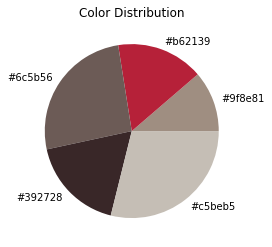

In [46]:
def show_colors_in_a_pie_chart(hex_colors):
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
    plt.title("Color Distribution")
    plt.show()

show_colors_in_a_pie_chart(hex_colors)


In [47]:
print("The most common color in the image is: {}".format(hex_colors[0]))

The most common color in the image is: #9f8e81
